In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Creating a function to evaluate f(x)

def evalf(x):
  assert type(x) is np.ndarray and len(x) == 2
  return (-x[0]+7)**2 + 100*(x[1]-(x[0])**2)**2

# Creating a function to evaluate the gradient, g(x)and returna numpy array

def evalg(x):
  assert type(x) is np.ndarray and len(x)==2
  return np.array([2*(x[0]-7)-400*x[0]*(x[1]-(x[0])**2), 200**(x[1]-(x[0])**2)])

# creating a funtion find_minimiser to find the value of x that minimized the function f(x)

def find_minimizer(start_x, tol, step):
  assert type(start_x) is np.ndarray and len(start_x)==2
  assert tol>= 0
  assert step>= 0

  x = start_x
  g_x = evalg(x)
  k =0

  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol):
    x = np.subtract(x, np.multiply(step,g_x))
    k += 1
    g_x = evalg(x)

    fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  return x, fvals,k


Optimal value of x1 and x2 :  [ 0.07920528 -0.43116014] 

Optimal value of x1 and x2 :  [ 0.04002963 -0.86777848] 

Optimal value of x1 and x2 :  [ 0.02674202 -1.3030883 ] 

Optimal value of x1 and x2 :  [ 0.02007612 -1.73796149] 



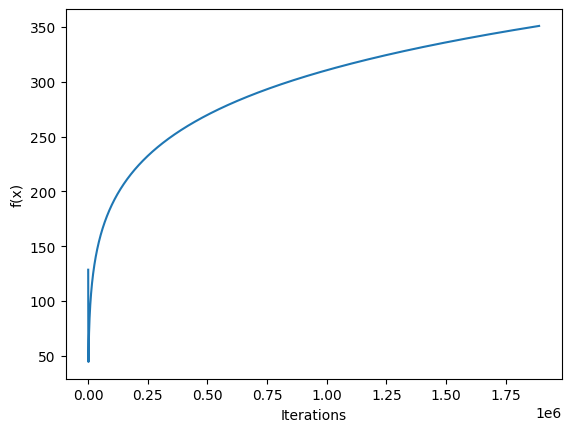

In [ ]:
#Checking the code and plotting the results by initialising a value

my_start_x = np.array([-1.5,1.5])
my_steplength = 0.001
my_tol= [1e-1,1e-2,1e-3,1e-4]
final_objective=[]
Num_of_itr=[]
opt_value=[]

for i in range(len(my_tol)):
  opt_x, fvals_ret,k = find_minimizer(my_start_x, my_tol[i], my_steplength)
  print('Optimal value of x1 and x2 : ', opt_x, '\n')
  final_objective.append(min(fvals_ret))
  Num_of_itr.append(k)
  opt_value.append(opt_x)




plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()


What is the minimizer and minimum function value of f(x) = f(x1, x2) = (a + 1 − x1)2 + b · (x2 − x21
)2 ?,
Where a is the last digit of your Roll Number and b is 100 if a is an even number, else b is 10. Use these values for other problem that follows

In [ ]:
# to find the minimiser and minimum value
minimum_value=min(final_objective)
minimiser=opt_value[final_objective.index(minimum_value)]
print(f"the Minimum VAlue ofthe function is {minimum_value} and minimiser of the function is {minimiser}")




the Minimum VAlue ofthe function is 44.37618883966369 and minimiser of the function is [ 0.07920528 -0.43116014]


#Part 2

In [ ]:
# to find the tabular form
import pandas as pd
data = {'Tau_values': my_tol, 'Final_Minimiser': final_objective, 'Iterations': Num_of_itr}
Tabular_form=pd.DataFrame(data)
Tabular_form

,Tau_values,Final_Minimiser,Iterations
0,0.1000,44.376189,3068
1,0.0100,44.376189,20171
2,0.0010,44.376189,190332
3,0.0001,44.376189,1890113


#part 3

<ipython-input-3-801607baeca2>:11: RuntimeWarning: overflow encountered in double_scalars
  df_dx1 = -2 * (6 + 1 - x1) - 400 * x1 * (x2 - x1**2)
<ipython-input-3-801607baeca2>:21: RuntimeWarning: invalid value encountered in subtract
  current_point = current_point - learning_rate * grad_f(*current_point)


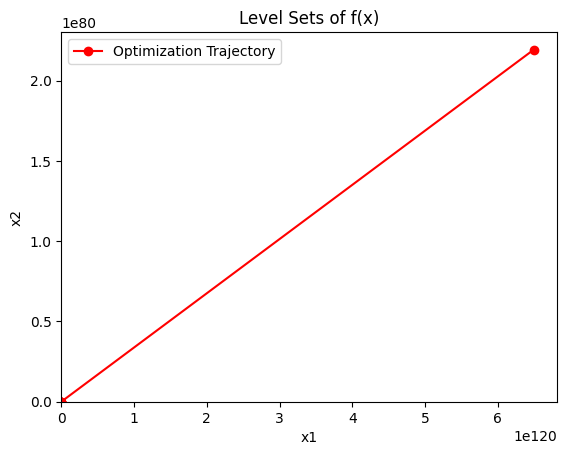

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x1, x2):
    return (6 + 1 - x1)**2 + 100 * (x2 - x1**2)**2

# Define the gradient of the function
def grad_f(x1, x2):
    df_dx1 = -2 * (6 + 1 - x1) - 400 * x1 * (x2 - x1**2)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# Define the optimization algorithm (e.g., gradient descent)
def gradient_descent(initial_point, learning_rate, num_iterations):
    trajectory = [initial_point]
    current_point = initial_point.copy()

    for _ in range(num_iterations):
        current_point = current_point - learning_rate * grad_f(*current_point)
        trajectory.append(current_point)

    return np.array(trajectory)

# Generate level sets
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Plot level sets
plt.contour(X1, X2, Z, levels=np.logspace(-3, 3, 20))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets of f(x)')

# Perform optimization and plot trajectory
initial_point = np.array([-2, -2])  # You can choose a different initial point
learning_rate = 0.005
num_iterations = 100

trajectory = gradient_descent(initial_point, learning_rate, num_iterations)
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label='Optimization Trajectory')
plt.legend()

plt.show()


#Part 4
Gradient descent with a constant step size (learning rate) has several shortcomings, and some of the key issues include:

Convergence Rate: Using a constant step size may result in slow convergence. A fixed learning rate might be too small, causing the algorithm to take many iterations to reach the minimum, or too large, causing overshooting and oscillations.

Sensitivity to Initial Learning Rate: The performance of the algorithm can be sensitive to the choice of the initial learning rate. A learning rate that works well for one problem may not be suitable for another.

Difficulty Adapting to Local Geometry: In regions with steep and flat directions, a fixed learning rate may not be ideal. It might be too small for the steep direction, leading to slow progress, and too large for the flat direction, causing oscillations or divergence.

To address these issues, an adaptive learning rate strategy can be employed. Here are a few possible solutions:

Learning Rate Schedules: Instead of a fixed learning rate, use a schedule that decreases the learning rate over time. Common approaches include time-based decay or using a step-wise decay where the learning rate is reduced after a certain number of iterations.

Line Search: At each iteration, perform a line search to determine the optimal step size along the search direction. This involves iteratively adjusting the step size until a suitable decrease in the objective function is achieved.

Adaptive Learning Rate Algorithms: Use algorithms that dynamically adjust the learning rate based on the behavior of the objective function. Examples include Adam, Adagrad, RMSprop, and AdaDelta, which adaptively scale the learning rates for different parameters.

Second-Order Methods: Incorporate information from the second-order derivatives (Hessian matrix) to guide the optimization process. Newton's method and quasi-Newton methods like BFGS fall into this category. However, these methods can be computationally expensive, especially for high-dimensional problems